In [276]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
import locale

locale.setlocale(
    locale.LC_ALL,
    'rus_rus' if sys.platform == 'win32' else 'ru_RU.UTF-8')

'Russian_Russia.1251'

In [277]:
data = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [285]:
# Оставим только российские города
russian_cities = data[data['Country'] == 'Russia']
russian_cities.loc[:, 'dt'] = pd.to_datetime(russian_cities['dt'])

# 3. Расчитать среднее значение температуры (поле AverageTemperature) по столетиям для России.

In [286]:
russian_cities_mean_temp = russian_cities
russian_cities_mean_temp.loc[:, 'century'] = (russian_cities['dt'].dt.year // 100).astype(int)
russian_cities_mean_temp = russian_cities_mean_temp.groupby('century')['AverageTemperature'].mean()
russian_cities_mean_temp


century
17    4.220250
18    2.875905
19    3.319573
20    4.730073
Name: AverageTemperature, dtype: float64

# 4. Рассчитать среднее значение температуры (поле AverageTemperature) по столетиям для города Белгород.

In [287]:
belgorod_mean_temp = russian_cities[russian_cities['City'] == 'Belgorod']
belgorod_mean_temp = belgorod_mean_temp.groupby('century')['AverageTemperature'].mean();
belgorod_mean_temp

century
17    6.000228
18    5.711438
19    6.266888
20    7.868878
Name: AverageTemperature, dtype: float64

# 5. Рассчитать максимальную и минимальную средние месячную и годовую температуры для города Абакан.

In [289]:
abakan_mean_temp = russian_cities[russian_cities['City'] == 'Abakan']
abakan_mean_temp_monthly = abakan_mean_temp.groupby(
    [abakan_mean_temp['dt'].dt.year, abakan_mean_temp['dt'].dt.month])['AverageTemperature'].mean()

abakan_monthly_min = abakan_mean_temp_monthly.min()
abakan_monthly_max = abakan_mean_temp_monthly.max()
print(abakan_monthly_max, abakan_monthly_min)

abakan_mean_temp_yearly = abakan_mean_temp.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
abakan_yearly_max = abakan_mean_temp_yearly.max()
abakan_yearly_min = abakan_mean_temp_yearly.min()
print(abakan_yearly_max, abakan_yearly_min)

21.503 -31.138
2.6065833333333344 -2.778


# 6. Определить даты, когда были зафиксированы максимальная и минимальная средние температуры в городе Архангельск.

In [290]:
arkhangelsk_mean_temp = russian_cities[russian_cities['City'] == 'Arkhangelsk']
max_temp_date = arkhangelsk_mean_temp.loc[arkhangelsk_mean_temp['AverageTemperature'].idxmax(), 'dt'].strftime('%Y-%m-%d')
min_temp_date = arkhangelsk_mean_temp.loc[arkhangelsk_mean_temp['AverageTemperature'].idxmin(), 'dt'].strftime('%Y-%m-%d')
print(max_temp_date, min_temp_date)

1960-07-01 1985-01-01


# 7. Построить график изменения средней температуры по годам для России за все время измерений.

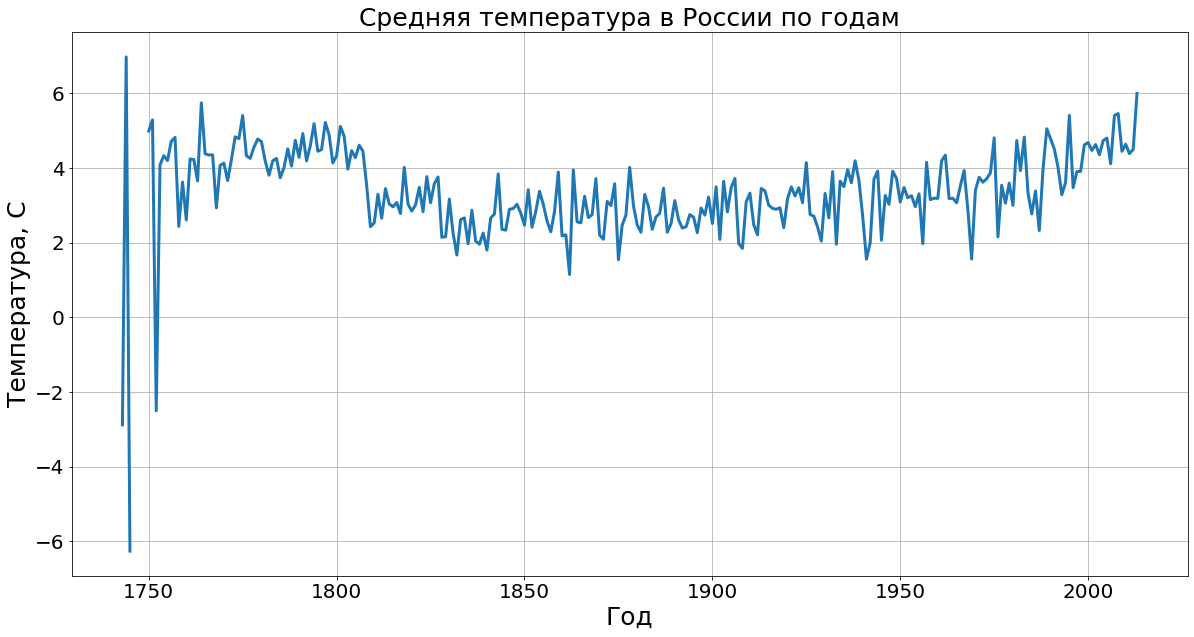

In [291]:
russian_temps = russian_cities.groupby(russian_cities["dt"].dt.year)['AverageTemperature'].mean()


plt.figure(figsize=(20, 10));

plt.plot(russian_temps, linewidth=3)

plt.xlabel('Год', fontsize=25)
plt.ylabel('Температура, С', fontsize=25)
plt.title('Средняя температура в России по годам', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.show()

# 8. Построить график изменения средней температуры по года для города Благовещенск за все время измерений.

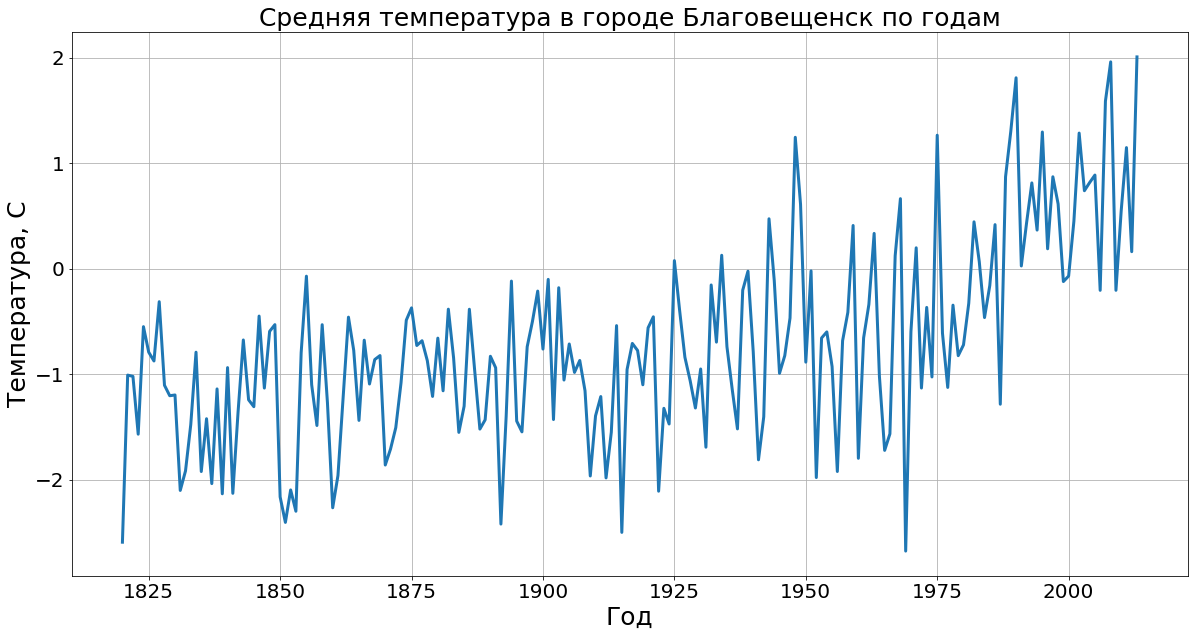

In [292]:
blagoveshchensk_cities = russian_cities[russian_cities['City'] == 'Blagoveshchensk']
blagoveshchensk_temps = blagoveshchensk_cities.groupby(blagoveshchensk_cities['dt'].dt.year)['AverageTemperature'].mean()


plt.figure(figsize=(20, 10));
plt.plot(blagoveshchensk_temps, linewidth=3)

plt.xlabel('Год', fontsize=25)
plt.ylabel('Температура, С', fontsize=25)
plt.title('Средняя температура в городе Благовещенск по годам', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()

# 9-10. Рассчитать среднюю месячную температуры для России за все время измерений и построить гистограмму распределения.

(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 <a list of 9 Text yticklabel objects>)

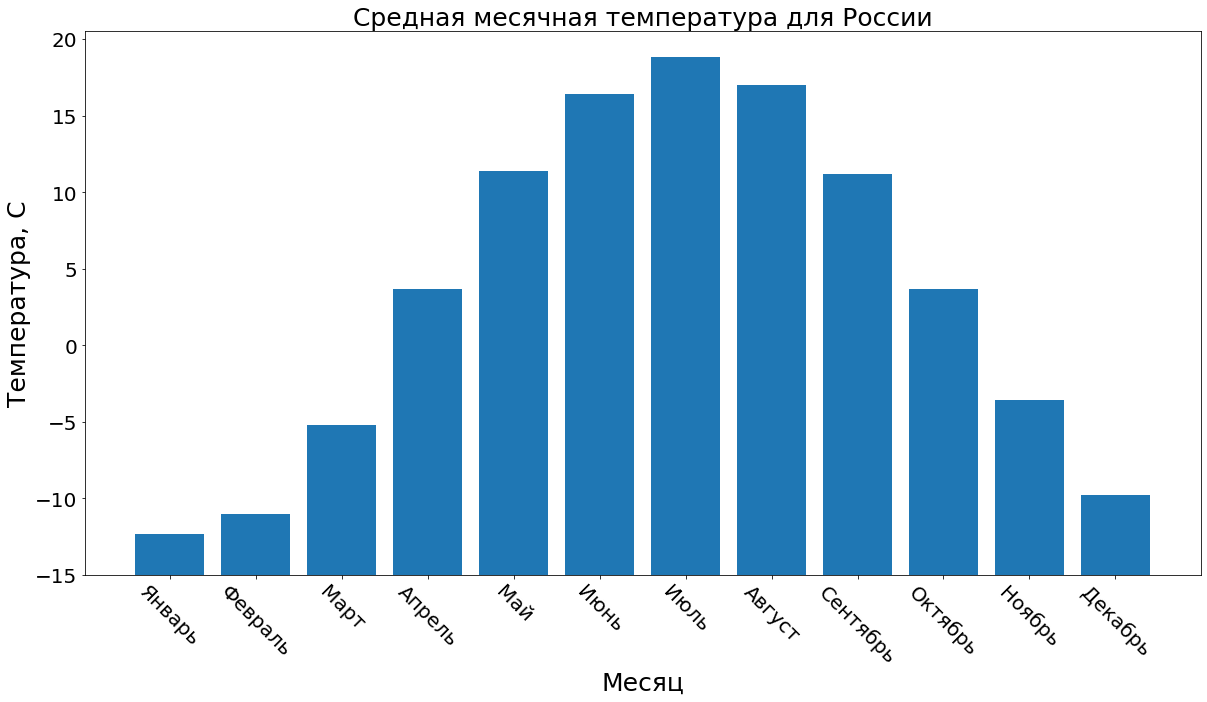

In [293]:
offset = 15
russian_temps = russian_cities.groupby([russian_cities['dt'].dt.month, 
                                        russian_cities['dt'].dt.month_name(locale='Russian')])['AverageTemperature'].mean()
russian_temps.index.names = ['dt', 'month_name']


plt.figure(figsize=(20, 10));
plt.bar(russian_temps.index.get_level_values('dt'), russian_temps + offset, bottom=-offset)
plt.xlabel('Месяц', fontsize=25)
plt.ylabel('Температура, С', fontsize=25)
plt.title('Средная месячная температура для России', fontsize=25)
plt.xticks(russian_temps.index.get_level_values('dt'), 
           russian_temps.index.get_level_values('month_name'),
           fontsize=20, rotation=-45)
plt.yticks(fontsize=20)

In [294]:
russian_temps



dt  month_name
1   Январь       -12.353077
2   Февраль      -11.053917
3   Март          -5.191750
4   Апрель         3.686839
5   Май           11.356855
6   Июнь          16.392740
7   Июль          18.811816
8   Август        17.025888
9   Сентябрь      11.177277
10  Октябрь        3.694212
11  Ноябрь        -3.596603
12  Декабрь       -9.774939
Name: AverageTemperature, dtype: float64

# 11. Рассчитать среднюю месячную температуры для города Батайск за все время измерений и построить гистограмму распределения.

(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 <a list of 8 Text yticklabel objects>)

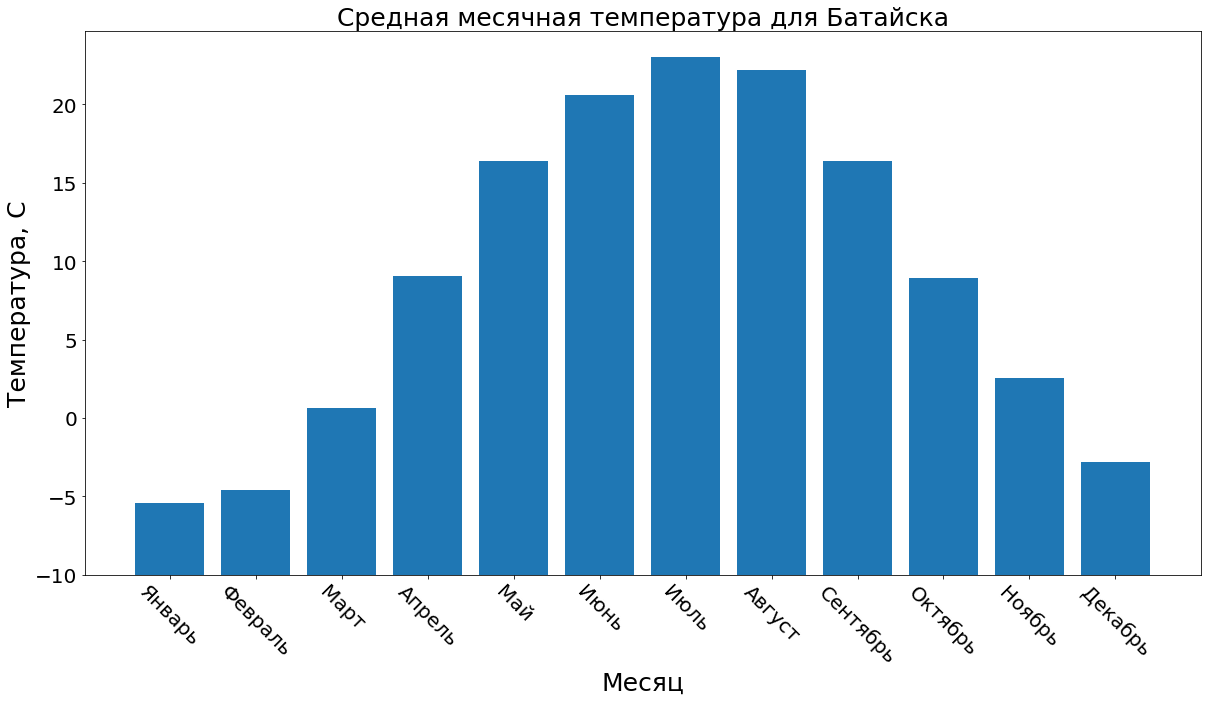

In [295]:
offset = 10
bataysk = russian_cities[russian_cities['City'] == 'Bataysk']
bataysk_temps = bataysk.groupby([bataysk['dt'].dt.month, 
                                 bataysk['dt'].dt.month_name(locale='Russian')])['AverageTemperature'].mean()
bataysk_temps.index.names = ['dt', 'month_name']


plt.figure(figsize=(20, 10));
plt.bar(bataysk_temps.index.get_level_values('dt'), bataysk_temps + offset, bottom=-offset)
plt.xlabel('Месяц', fontsize=25)
plt.ylabel('Температура, С', fontsize=25)
plt.title('Средная месячная температура для Батайска', fontsize=25)
plt.xticks(bataysk_temps.index.get_level_values('dt'), 
           bataysk_temps.index.get_level_values('month_name'),
           fontsize=20, rotation=-45)
plt.yticks(fontsize=20)

In [296]:
bataysk_temps

dt  month_name
1   Январь        -5.420394
2   Февраль       -4.610635
3   Март           0.636595
4   Апрель         9.082305
5   Май           16.362859
6   Июнь          20.598822
7   Июль          22.997496
8   Август        22.151989
9   Сентябрь      16.396156
10  Октябрь        8.939357
11  Ноябрь         2.543700
12  Декабрь       -2.787179
Name: AverageTemperature, dtype: float64